In [3]:
import sys
import numpy as np
import cv2


img = cv2.imread('./lenna.bmp')

if img is None:
    print('Image load failed!')
    sys.exit()

cv2.namedWindow('img')
cv2.imshow('img', img)

while True:
    keycode = cv2.waitKey()
    if keycode == ord('i') or keycode == ord('I'):
        img = ~img
        cv2.imshow('img', img)
    elif keycode == 27 or keycode == ord('q') or keycode == ord('Q'):
        break

cv2.destroyAllWindows()


KeyboardInterrupt: 

In [ ]:
import sys
import numpy as np
import cv2


def on_mouse(event, x, y, flags, param):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        print('EVENT_LBUTTONDOWN: %d, %d' % (x, y))

    elif event == cv2.EVENT_LBUTTONUP:
        print('EVENT_LBUTTONUP: %d, %d' % (x, y))

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 255, 255), 2)
            cv2.imshow('img', img)
            oldx, oldy = x, y


img = cv2.imread('./lenna.bmp')

if img is None:
    print('Image load failed!')
    sys.exit()

cv2.namedWindow('img')
cv2.setMouseCallback('img', on_mouse)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


EVENT_LBUTTONDOWN: 220, 248
EVENT_LBUTTONUP: 225, 240
EVENT_LBUTTONDOWN: 300, 279
EVENT_LBUTTONUP: 305, 268
EVENT_LBUTTONDOWN: 306, 356
EVENT_LBUTTONUP: 243, 360
EVENT_LBUTTONDOWN: 100, 375
EVENT_LBUTTONUP: 285, 142
EVENT_LBUTTONDOWN: 403, 122
EVENT_LBUTTONUP: 169, 275


In [ ]:
import cv2

title = 'mouse event'                   # 창 제목
img = cv2.imread('./lenna.bmp') # 백색 이미지 읽기
cv2.imshow(title, img)                  # 백색 이미지 표시

colors = {'black':(0,0,0),
         'red' : (0,0,255),
         'blue':(255,0,0),
         'green': (0,255,0),
         'yellow': (0,255,255),
         } # 색상 미리 정의
# 폰트 설정 (폰트 파일 경로와 크기 설정)
# fontpath = "./MALGUN.TTF"  # TTF 폰트 파일 경로를 지정
# try:
#     font = ImageFont.truetype(fontpath, 40)  # 폰트 크기를 40으로 설정
# except IOError:
#     # 폰트 파일을 찾을 수 없을 경우 기본 폰트 사용
#     font = ImageFont.load_default()
        
def onMouse(event, x, y, flags, param): # 아무스 콜백 함수 구현 ---①
    print(event, x, y, flags)                # 파라미터 출력
    color = colors['black']
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 버튼 누름인 경우 ---②
        # 컨트롤키와 쉬프트 키를 모두 누른 경우
        if flags & cv2.EVENT_FLAG_CTRLKEY and flags & cv2.EVENT_FLAG_SHIFTKEY : 
            color = colors['green']
        elif flags & cv2.EVENT_FLAG_SHIFTKEY : # 쉬프트 키를 누른 경우
            color = colors['blue']
        elif flags & cv2.EVENT_FLAG_CTRLKEY : # 컨트롤 키를 누른 경우
            color = colors['red']
        # 지름 30 크기의 검은색 원을 해당 좌표에 그림
        cv2.circle(img, (x,y), 30, color, 5) 
        cv2.imshow(title, img)          # 그려진 이미지를 다시 표시 ---③
    elif event == cv2.EVENT_RBUTTONDOWN :          
        color = colors['green']
        cv2.putText(img, "Plain", (50, 100), cv2.FONT_HERSHEY_PLAIN, 5, color)      
        cv2.circle(img, (x,y), 30, color, 5) 
        cv2.imshow(title, img)          # 그려진 이미지를 다시 표시 ---③
    elif event == cv2.EVENT_RBUTTONDBLCLK :  
        color = colors['yellow']
        cv2.circle(img, (x,y), 50, color, 5) 
        cv2.imshow(title, img)          # 그려진 이미지를 다시 표시 ---③

cv2.setMouseCallback(title, onMouse)    # 마우스 콜백 함수를 GUI 윈도우에 등록 ---④

while True:
    if cv2.waitKey(0) & 0xFF == 27:     # esc로 종료
        break
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

win_name = 'Trackbar'                                   # 창 이름

img = cv2.imread('./lenna.bmp')
cv2.imshow(win_name,img)                                # 초기 이미지를 창에 표시

# 트랙바 이벤트 처리 함수 선언 ---①
def onChange(x):                                        
    print(x)                                            # 트랙바 새로운 위치 값 --- ②
    # 'R', 'G', 'B' 각 트랙바 위치 값    --- ③
    r = cv2.getTrackbarPos('R',win_name)               
    g = cv2.getTrackbarPos('G',win_name)               
    b = cv2.getTrackbarPos('B',win_name)               
    print(r, g, b)
    img[:] = [b,g,r]                                    # 기존 이미지에 새로운 픽셀 값 적용 --- ④
    cv2.imshow(win_name, img)                           # 새 이미지 창에 표시

# 트랙바 생성    --- ⑤
cv2.createTrackbar('R', win_name, 255, 255, onChange)  
cv2.createTrackbar('G', win_name, 255, 255, onChange)
cv2.createTrackbar('B', win_name, 255, 255, onChange)

while True:
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()        

In [ ]:
import cv2
import numpy as np

img = np.zeros((120,120, 3), dtype=np.uint8)    # 120x120 2차원 배열 생성, 3채널 컬러 이미지
img[25:35, :] = [255,0,0]                       # 25~35행 모든 열에 [255,0,0], 파랑색 할당 
img[55:65, :] = [0, 255, 0]                     # 55~65행 모든 열에 [0,255,0], 초록색 할당 
img[85:95, :] = [0,0,255]                       # 85~95행 모든 열에 [0,0,255], 빨강색 할당 
img[:, 35:45] = [255,255,0]                     # 모든행 35~45 열에 [255,255,0], 하늘색 할당 
img[:, 75:85] = [255,0,255]                     # 모든행 75~85 열에 [255,0,255], 분홍색 할당 
cv2.imshow('BGR', img)
if cv2.waitKey(0) & 0xFF == 27:
    cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

img = np.zeros((360,360, 3), dtype=np.uint8)    # 120x120 2차원 배열 생성, 3채널 컬러 이미지
img[0:60, :] = [200,150,50]                       # 25~35행 모든 열에 [255,0,0], 파랑색 할당 
img[60:120, :] = [200,150,150]                       # 25~35행 모든 열에 [255,0,0], 파랑색 할당 
img[120:180, :] = [200,200,0]                       # 25~35행 모든 열에 [255,0,0], 파랑색 할당 
img[180:240, :] = [200,0,150]                       # 25~35행 모든 열에 [255,0,0], 파랑색 할당 
img[240:300, :] = [255,0,150]                       # 25~35행 모든 열에 [255,0,0], 파랑색 할당 
img[300:360, :] = [255,100,100]                       # 25~35행 모든 열에 [255,0,0], 파랑색 할당  
img[0:60, 60:120] = [0,20,0]                       # 25~35행 모든 열에 [255,0,0], 파랑색 할당 
img[0:60, 240:300] = [255,0,0]                       # 25~35행 모든 열에 [255,0,0], 파랑색 할당 
img[240:300, 0:60] = [200,150,50]    
img[60:120, 0:60] = [50,0,50]                       # 25~35행 모든 열에 [255,0,0], 파랑색 할당 
img[60:120, 60:120] = [200,230,0]                       # 25~35행 모든 열에 [255,0,0], 파랑색 할당 
img[60:120, 120:180] = [200,0,100]                       # 25~35행 모든 열에 [255,0,0], 파랑색 할당 
img[180:240, 180:240] = [255,0,0]                       # 25~35행 모든 열에 [255,0,0], 파랑색 할당 
img[240:300, 240:300] = [100,0,100]                       # 25~35행 모든 열에 [255,0,0], 파랑색 할당 
img[300:360:, 300:360] = [100,100,100]                       # 25~35행 모든 열에 [255,0,0], 파랑색 할당 
cv2.imshow('BGR', img)
if cv2.waitKey(0) & 0xFF == 27:
    cv2.destroyAllWindows()

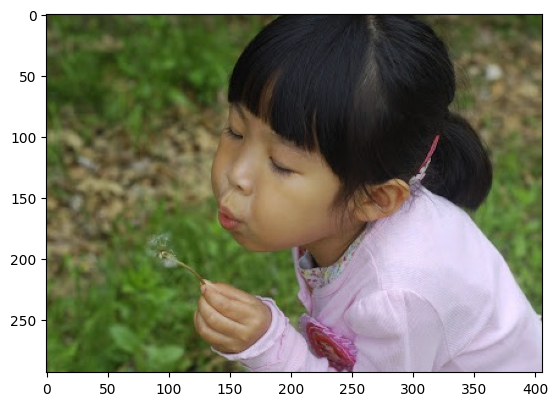

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./girl.jpg')

# BGR을 RGB로 변환
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.waitKey()
plt.imshow(img_rgb)
plt.show()

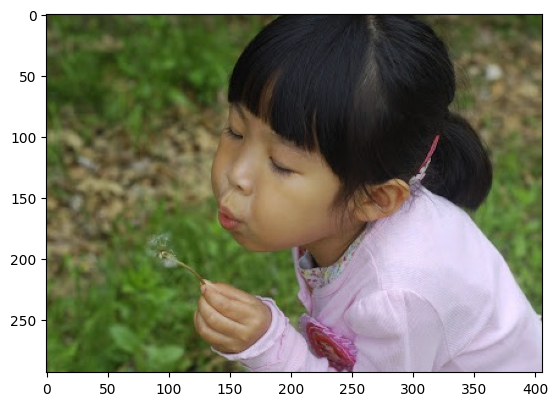

In [ ]:
import cv2
from matplotlib import pyplot as plt 
img = cv2.imread('./girl.jpg') 
plt.imshow(img[:,:,::-1])       
# plt.xticks([])                    
# plt.yticks([])                   
plt.show()

In [ ]:
import numpy as np

arr = np.array([1,2,3,4,5])
arr 

array([1, 2, 3, 4, 5])

In [ ]:
arr[:]

array([1, 2, 3, 4, 5])

In [ ]:
arr[:].ndim

1

In [ ]:
import numpy as np

arr2 = np.array([[1,2,3,4,5],[6,7,8,9,0]])
arr2

array([[1, 2, 3, 4, 5],
       [6, 7, 8, 9, 0]])

In [ ]:
arr2.ndim

2

In [ ]:
arr2[:,:]

array([[1, 2, 3, 4, 5],
       [6, 7, 8, 9, 0]])

In [ ]:
arr2[:1, 1:4]

array([[2, 3, 4]])

In [ ]:
np.arange(1, 5+1, 3)

array([1, 4])

In [ ]:
np.arange(1, 5+1, -1)

array([], dtype=int32)

In [ ]:
arr2[:1, 1:4]

array([[2, 3, 4]])

In [ ]:
arr3 = np.array([
    [[1,2,3,4,5],
     [11,22,33,44,55]],
    [[6,7,8,9,10],
     [66,77,88,99,100]],
    [[11,12,13,14,15],
     [110,120,130,140,150]]
])
arr3

array([[[  1,   2,   3,   4,   5],
        [ 11,  22,  33,  44,  55]],

       [[  6,   7,   8,   9,  10],
        [ 66,  77,  88,  99, 100]],

       [[ 11,  12,  13,  14,  15],
        [110, 120, 130, 140, 150]]])

In [ ]:
arr3.ndim

3

In [ ]:
arr3[:,:,:]

array([[[  1,   2,   3,   4,   5],
        [ 11,  22,  33,  44,  55]],

       [[  6,   7,   8,   9,  10],
        [ 66,  77,  88,  99, 100]],

       [[ 11,  12,  13,  14,  15],
        [110, 120, 130, 140, 150]]])

In [ ]:
arr3[:,:,-1]

array([[  5,  55],
       [ 10, 100],
       [ 15, 150]])

In [ ]:
arr3[:,:,(2,1,0)]

array([[[  3,   2,   1],
        [ 33,  22,  11]],

       [[  8,   7,   6],
        [ 88,  77,  66]],

       [[ 13,  12,  11],
        [130, 120, 110]]])

In [ ]:
arr3[:,:,(0,1,2)]

array([[[  1,   2,   3],
        [ 11,  22,  33]],

       [[  6,   7,   8],
        [ 66,  77,  88]],

       [[ 11,  12,  13],
        [110, 120, 130]]])

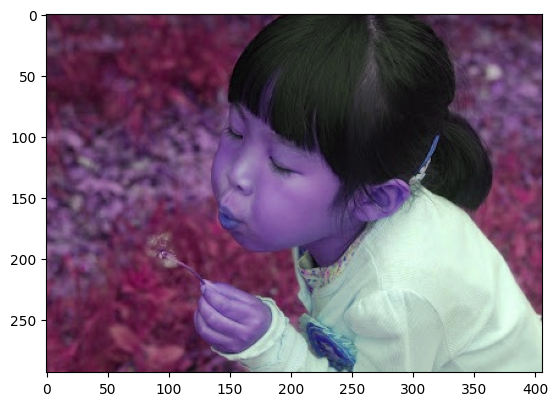

In [ ]:
import cv2
from matplotlib import pyplot as plt 
img = cv2.imread('./girl.jpg') 
plt.imshow(img[:,:,(1,0,2)])       
#plt.imshow(img[:,:,(2,1,0)])       
plt.show()

In [ ]:
import cv2
import numpy as np

img = cv2.imread('./sunset.jpg')

x=320; y=150; w=50; h=50        # roi 좌표
roi = img[y:y+h, x:x+w]         # roi 지정        ---①

print(roi.shape)                # roi shape, (50,50,3)
cv2.rectangle(roi, (0,0), (h-1, w-1), (0,255,0)) # roi 전체에 사각형 그리기 ---②
cv2.imshow("img", img)

key = cv2.waitKey(0)
print(key)
cv2.destroyAllWindows()

(50, 50, 3)
-1


In [ ]:
import cv2
import numpy as np

isDragging = False                      # 마우스 드래그 상태 저장 
x0, y0, w, h = -1,-1,-1,-1              # 영역 선택 좌표 저장
blue, red = (255,0,0),(0,0,255)         # 색상 값 

def onMouse(event,x,y,flags,param):     # 마우스 이벤트 핸들 함수  ---①
    global isDragging, x0, y0, img      # 전역변수 참조
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 마우스 버튼 다운, 드래그 시작 ---②
        isDragging = True
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE:  # 마우스 움직임 ---③
        if isDragging:                  # 드래그 진행 중
            img_draw = img.copy()       # 사각형 그림 표현을 위한 이미지 복제
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2) # 드래그 진행 영역 표시
            cv2.imshow('img', img_draw) # 사각형 표시된 그림 화면 출력
    elif event == cv2.EVENT_LBUTTONUP:  # 왼쪽 마우스 버튼 업 ---④
        if isDragging:                  # 드래그 중지
            isDragging = False          
            w = x - x0                  # 드래그 영역 폭 계산
            h = y - y0                  # 드래그 영역 높이 계산
            print("x:%d, y:%d, w:%d, h:%d" % (x0, y0, w, h))
            # x, y, w, h = cv2.selectPOI('img', img_draw, True)
            if w > 0 and h > 0:         # 폭과 높이가 음수이면 드래그 방향이 옳음 ---⑤
                img_draw = img.copy()   # 선택 영역에 사각형 그림을 표시할 이미지 복제
                # 선택 영역에 빨간 사각형 표시
                cv2.rectangle(img_draw, (x0, y0), (x, y), red, 2) 
                cv2.imshow('img', img_draw) # 빨간 사각형 그려진 이미지 화면 출력
                roi = img[y0:y0+h, x0:x0+w] # 원본 이미지에서 선택 영영만 ROI로 지정 ---⑥
                cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
                cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
                cv2.imwrite('./cropped.jpg', roi)   # ROI 영역만 파일로 저장 ---⑦
                print("croped.")
            else:
                cv2.imshow('img', img)  # 드래그 방향이 잘못된 경우 사각형 그림ㅇㅣ 없는 원본 이미지 출력
                print("좌측 상단에서 우측 하단으로 영역을 드래그 하세요.")

# img = cv2.imread('./sunset.jpg')
img = cv2.imread('./bbbbb.png')
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse) # 마우스 이벤트 등록 ---⑧
cv2.waitKey()
cv2.destroyAllWindows()


x:142, y:103, w:361, h:395
croped.
x:130, y:38, w:0, h:-2
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.


In [ ]:
import cv2
import numpy as np 

img1 = cv2.imread('./bbbbb.png')   
img2 = cv2.imread('./bbbbb.png', cv2.IMREAD_COLOR)     
img3 = cv2.imread('./bbbbb.png', cv2.IMREAD_UNCHANGED)  
img4 = cv2.imread('./bbbbb.png', cv2.IMREAD_GRAYSCALE) 
print(" img1:" , img1.shape , end="")
print(" img2:" , img2.shape , end="")
print(" img3:" , img3.shape , end="")
print(" img4:" , img4.shape)


img5 = cv2.imread('./bbbbb.png')   
img6 = cv2.imread('./bbbbb.png', cv2.IMREAD_COLOR)     
img7 = cv2.imread('./bbbbb.png', cv2.IMREAD_UNCHANGED)  
img8 = cv2.imread('./bbbbb.png', cv2.IMREAD_GRAYSCALE) 
print(" img5:" , img5.shape , end="")
print(" img6:" , img6.shape , end="")
print(" img7:" , img7.shape , end="")
print(" img8:" , img8.shape) 

cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.imshow('img4', img4)

#cv2.imshow('alpha', img3[:,:,3])  # 알파 채널만 표시
cv2.moveWindow('img2', 0, 0)
cv2.moveWindow('img2', 100, 100)


cv2.waitKey(0)
cv2.destroyAllWindows()

 img1: (719, 606, 3) img2: (719, 606, 3) img3: (719, 606, 4) img4: (719, 606)
 img5: (719, 606, 3) img6: (719, 606, 3) img7: (719, 606, 4) img8: (719, 606)


In [ ]:
import cv2
import numpy as np

img = cv2.imread('./bbbbb.png')

img2 = img.astype(np.uint16)                # dtype 변경 ---①
b,g,r = cv2.split(img2)                     # 채널 별로 분리 ---②
#b,g,r = img2[:,:,0], img2[:,:,1], img2[:,:,2]
gray1 = ((b + g + r)/3).astype(np.uint8)    # 평균 값 연산후 dtype 변경 ---③

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # BGR을 그레이 스케일로 변경 ---④
cv2.imshow('original', img)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Read the image
img = cv2.imread('./bbbbb.png')

# Split the image into its B, G, R channels
b, g, r = cv2.split(img)

# Manual grayscale conversion by averaging the B, G, and R channels
# This is a basic method and does not account for the perceptual differences in color channels.
gray1 = ((b + g + r) / 3).astype(np.uint8)

# Standard grayscale conversion using cv2.cvtColor
# The flag used should be cv2.COLOR_BGR2GRAY instead of cv2.COLOR_BAYER_GR2GRAY for normal images.
gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the original image
cv2.imshow('original', img)

# Display the manually calculated grayscale image
cv2.imshow('gray1', gray1)

# Display the grayscale image generated using cv2.cvtColor
cv2.imshow('gray2', gray2)

# Wait for a key press and close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

img = cv2.imread('./aaaaa.jpg')

img2 = img.astype(np.uint16)                # dtype 변경 ---①
b,g,r = cv2.split(img2)                     # 채널 별로 분리 ---②
#b,g,r = img2[:,:,0], img2[:,:,1], img2[:,:,2]
gray1 = ((b + g + r)/3).astype(np.uint8)    # 평균 값 연산후 dtype 변경 ---③

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # BGR을 그레이 스케일로 변경 ---④
cv2.imshow('original', img)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np
img = cv2.imread('./bbbbb.png')
b, g, r = cv2.split(img)
print(np.max(b+g+r))
print(np.min(b+g+r))

255
0


In [ ]:
g

array([[19, 17, 17, ..., 14, 13, 13],
       [20, 20, 12, ...,  9,  9, 13],
       [10,  4, 11, ..., 16,  3, 12],
       ...,
       [13, 10, 12, ..., 24, 11, 14],
       [ 9, 15, 13, ..., 18,  9, 15],
       [18, 10, 14, ..., 18, 16, 16]], dtype=uint8)

In [ ]:
r

array([[22, 21, 20, ..., 21, 18, 16],
       [23, 24, 16, ..., 15, 15, 17],
       [15,  9, 15, ..., 21,  7, 17],
       ...,
       [17, 14, 16, ..., 28, 16, 21],
       [14, 21, 20, ..., 22, 15, 21],
       [23, 15, 20, ..., 24, 23, 23]], dtype=uint8)

In [ ]:
b+g

array([[25, 22, 24, ..., 20, 18, 18],
       [30, 32, 17, ...,  9, 11, 17],
       [14,  5, 17, ..., 26,  4, 16],
       ...,
       [22, 13, 14, ..., 38, 15, 19],
       [13, 23, 17, ..., 23,  9, 18],
       [30, 12, 20, ..., 24, 22, 21]], dtype=uint8)

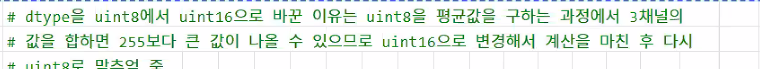

In [ ]:
import cv2
import numpy as np

#---① BGR 컬러 스페이스로 원색 픽셀 생성
red_bgr = np.array([[[0,0,255]]], dtype=np.uint8)   # 빨강 값만 갖는 픽셀
green_bgr = np.array([[[0,255,0]]], dtype=np.uint8) # 초록 값만 갖는 픽셀
blue_bgr = np.array([[[255,0,0]]], dtype=np.uint8)  # 파랑 값만 갖는 픽셀
yellow_bgr = np.array([[[0,255,255]]], dtype=np.uint8) # 노랑 값만 갖는 픽셀

#---② BGR 컬러 스페이스를 HSV 컬러 스페이스로 변환
red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV);
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV);
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV);
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV);

#---③ HSV로 변환한 픽셀 출력
print("red:", red_hsv)
print("green:", green_hsv)
print("blue", blue_hsv)
print("yellow", yellow_hsv)

red: [[[  0 255 255]]]
green: [[[ 60 255 255]]]
blue [[[120 255 255]]]
yellow [[[ 30 255 255]]]


In [13]:
import cv2
import numpy as np

# 이미지 읽기
img = cv2.imread('./bbbbb.png')

# 루미넌스 계산
gray_luminance = 0.2989 * img[:,:,2] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,0]
gray_luminance = gray_luminance.astype(np.uint8)

# OpenCV의 표준 변환과 비교
gray_cv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이미지 출력
cv2.imshow('original', img)
cv2.imshow('Luminance Gray', gray_luminance)
cv2.imshow('OpenCV Gray', gray_cv)

cv2.waitKey(0)
cv2.destroyAllWindows()

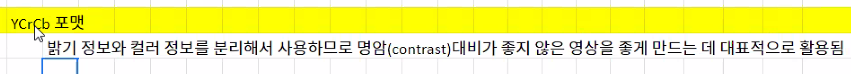

(256,)


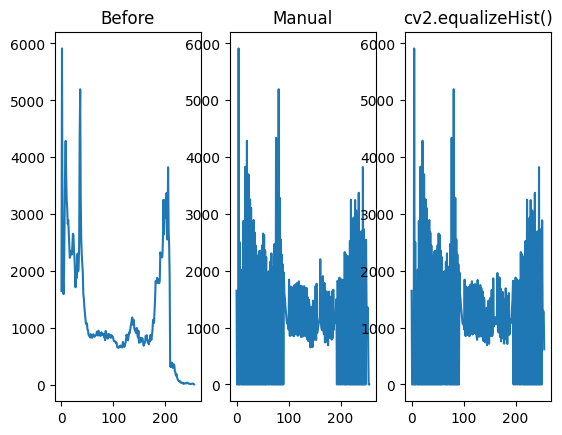

: 

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 대상 영상으로 그레이 스케일로 읽기
img = cv2.imread('./yate.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape[:2]

#--② 이퀄라이즈 연산을 직접 적용
hist = cv2.calcHist([img], [0], None, [256], [0, 256]) #히스토그램 계산
cdf = hist.cumsum()                                     # 누적 히스토그램 
cdf_m = np.ma.masked_equal(cdf, 0)                      # 0(zero)인 값을 NaN으로 제거
cdf_m = (cdf_m - cdf_m.min()) /(rows * cols) * 255      # 이퀄라이즈 히스토그램 계산
cdf = np.ma.filled(cdf_m,0).astype('uint8')             # NaN을 다시 0으로 환원
print(cdf.shape)
img2 = cdf[img]                                         # 히스토그램을 픽셀로 맵핑

#--③ OpenCV API로 이퀄라이즈 히스토그램 적용
img3 = cv2.equalizeHist(img)

#--④ 이퀄라이즈 결과 히스토그램 계산
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

#--⑤ 결과 출력
cv2.imshow('Before', img)
cv2.imshow('Manual', img2)
cv2.imshow('cv2.equalizeHist()', img3)
hists = {'Before':hist, 'Manual':hist2, 'cv2.equalizeHist()':hist3}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()

In [14]:
import numpy as np, cv2

img = cv2.imread('./bbbbb.png') #이미지 읽기, BGR 스케일

#--① 컬러 스케일을 BGR에서 YUV로 변경
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) 

#--② YUV 컬러 스케일의 첫번째 채널에 대해서 이퀄라이즈 적용
# img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) 
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) 

#--③ 컬러 스케일을 YUV에서 BGR로 변경
img2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) 

cv2.imshow('Before', img)
cv2.imshow('After', img2)
cv2.waitKey()
cv2.destroyAllWindows()

127.0


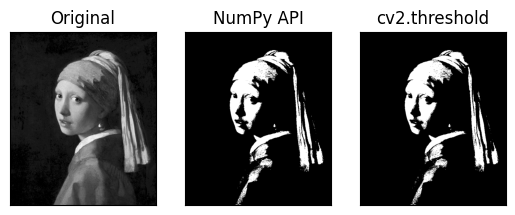

In [15]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./bbbbb.png', cv2.IMREAD_GRAYSCALE) #이미지를 그레이 스케일로 읽기

# --- ① NumPy API로 바이너리 이미지 만들기
thresh_np = np.zeros_like(img)   # 원본과 동일한 크기의 0으로 채워진 이미지
thresh_np[ img > 127] = 255      # 127 보다 큰 값만 255로 변경

# ---② OpenCV API로 바이너리 이미지 만들기
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
print(ret)  # 127.0, 바이너리 이미지에 사용된 문턱 값 반환

# ---③ 원본과 결과물을 matplotlib으로 출력
imgs = {'Original': img, 'NumPy API':thresh_np, 'cv2.threshold': thresh_cv}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()



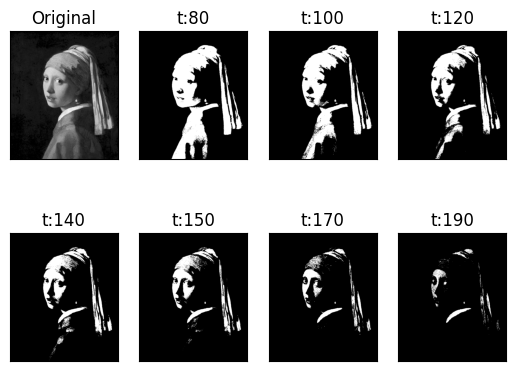

In [8]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./bbbbb.png', cv2.IMREAD_GRAYSCALE) #이미지를 그레이 스케일로 읽기
thresholds = [80, 100, 120, 140, 150, 170, 190]
imgs = {'Original' : img}
for t in thresholds:
    _, t_img = cv2.threshold(img, t, 255, cv2.THRESH_BINARY) 
    imgs['t:%d'%t] = t_img

for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(2, 4, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()



# Threshold_adapted

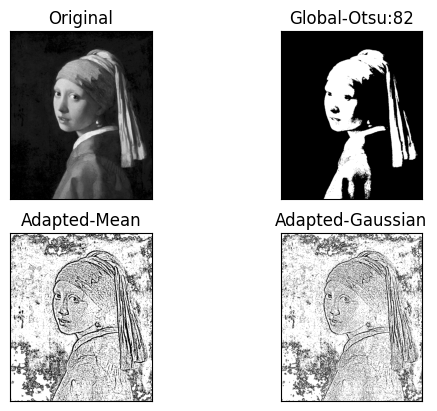

In [30]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

blk_size = 9        # 블럭 사이즈
C = 5               # 차감 상수 
# img = cv2.imread('./test4_02.png', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기
img = cv2.imread('./bbbbb.png', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기

# ---① 오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ---② 어뎁티드 쓰레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, blk_size, C)
# ---③ 결과를 Matplot으로 출력
imgs = {
        'Original': img, 
        'Global-Otsu:%d'%ret:th1,  
        'Adapted-Mean':th2, 
        'Adapted-Gaussian': th3
}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])
plt.show()


In [21]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./bbbbb.png', cv2.IMREAD_GRAYSCALE)

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'origin':img, 'BINARY':t_bin, 'BINARY_INV':t_bininv, \
        'TRUNC':t_truc, 'TOZERO':t_2zr, 'TOZERO_INV':t_2zrinv}
        
for i, (key, value) in enumerate(imgs.items()):
    cv2.imshow(key, value)
    if i==3: 
        print(value[-1, -1])
    
cv2.waitKey()
cv2.destroyAllWindows()


21


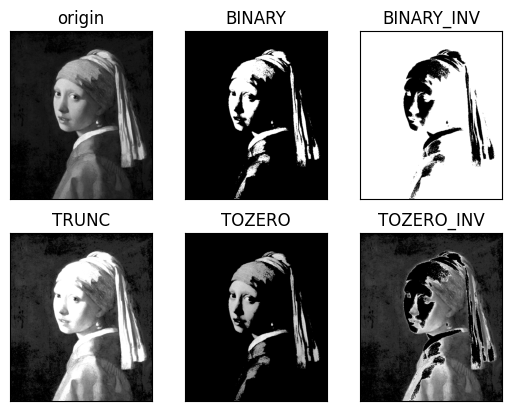

In [23]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./bbbbb.png', cv2.IMREAD_GRAYSCALE)

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {
    'origin':img, 
    'BINARY':t_bin, 
    'BINARY_INV':t_bininv,
    'TRUNC':t_truc, 
    'TOZERO':t_2zr, 
    'TOZERO_INV':t_2zrinv
}
        
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]);    plt.yticks([])
    
plt.show()
